# Imports & Visualisation

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
url = 'https://github.com/womega/Covid19_project/blob/master/Training%20and%20tuning/final_dataset.csv?raw=true'
data = pd.read_csv('final_dataset.csv')
unlabeled = pd.read_csv('unlabeled_data_nosubdomlvls.csv').drop('Label', axis=1)

In [3]:
data.head()

,Domain,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
0,webmail.covid.mataroma.ma.gov.br,8,30,0,3.625807,2.155639,3.606937,0,0.218750,0,0,0,2,0
1,coronaparser.cf,3,14,0,3.189898,2.855389,2.855389,0,0.400000,0,1,0,0,1
2,coronavirus.paranavai.pr.gov.br,6,29,0,3.446807,2.281036,3.232102,0,0.354839,0,0,0,1,0
3,covid19immunitystaffing.com,6,26,0,3.912114,3.827910,3.827910,0,0.296296,0,0,0,0,1
4,covid19scanning.com,5,18,0,3.536887,3.323231,3.323231,0,0.421053,0,0,0,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67616 entries, 0 to 67615
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Domain              67616 non-null  object 
 1   Num_words           67616 non-null  int64  
 2   Num_chars           67616 non-null  int64  
 3   Hyphen              67616 non-null  int64  
 4   Entropy_sdsu        67616 non-null  float64
 5   Entropy_nosdsu      67616 non-null  float64
 6   Entropy_nosu        67616 non-null  float64
 7   Tranco_Rank         67616 non-null  int64  
 8   Longest_word_ratio  67616 non-null  float64
 9   Typos               67616 non-null  int64  
 10  Freenom_TLD         67616 non-null  int64  
 11  Other_numbers       67616 non-null  int64  
 12  Subdomain levels    67616 non-null  int64  
 13  Label               67616 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 7.2+ MB


## Countplot

Counter({1: 61645, 0: 5971})


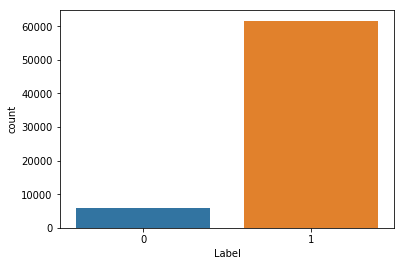

In [5]:
print(Counter(data['Label']))
sns.countplot(data['Label'])

## Histograms

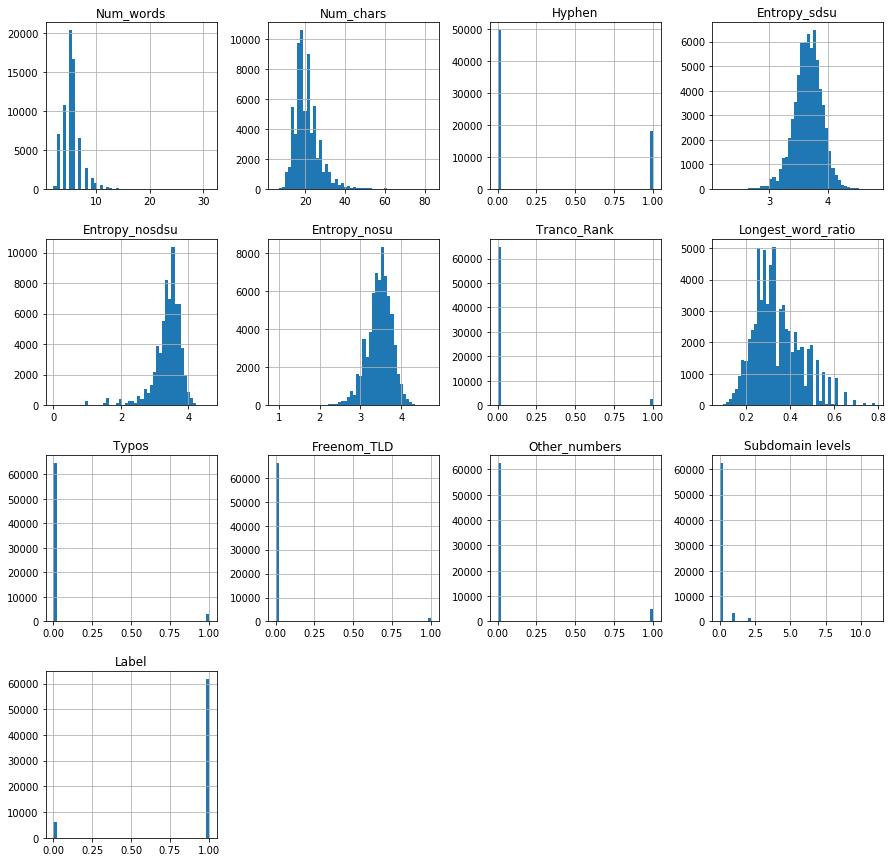

In [6]:
data.hist(bins = 50,figsize = (15,15))
plt.show()

## Correlation heatmap

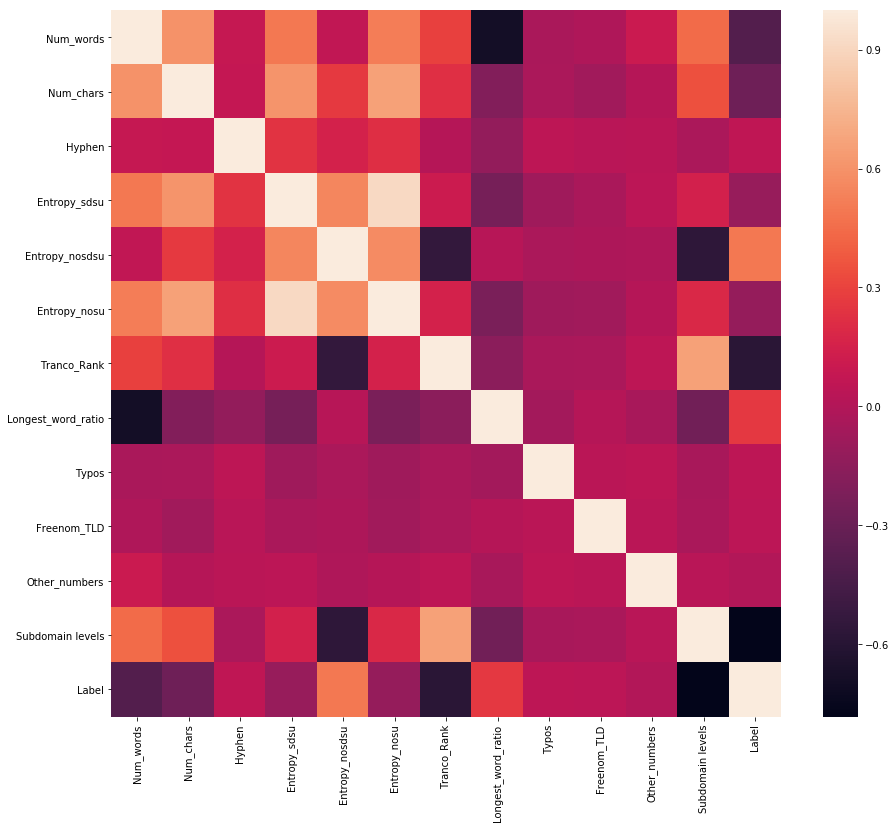

In [7]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

## Decription

In [8]:
data.describe()

,Num_words,Num_chars,Hyphen,Entropy_sdsu,Entropy_nosdsu,Entropy_nosu,Tranco_Rank,Longest_word_ratio,Typos,Freenom_TLD,Other_numbers,Subdomain levels,Label
count,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000,67616.000000
mean,5.435666,20.748506,0.267599,3.665614,3.379876,3.465380,0.040153,0.341286,0.044102,0.020823,0.074775,0.106232,0.911692
std,1.763676,6.200718,0.442711,0.236599,0.426790,0.299440,0.196320,0.108258,0.205323,0.142794,0.263030,0.411330,0.283744
min,2.000000,5.000000,0.000000,2.155639,-0.000000,0.918296,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,17.000000,0.000000,3.521641,3.238901,3.281036,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.000000,20.000000,0.000000,3.682006,3.454822,3.499228,0.000000,0.322581,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,24.000000,1.000000,3.825252,3.640224,3.664498,0.000000,0.407407,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,83.000000,1.000000,4.810857,4.602213,4.723606,1.000000,0.785714,1.000000,1.000000,1.000000,11.000000,1.000000


# Preprocessing

In [9]:
X = data.drop(['Domain', 'Label', 'Subdomain levels'], axis=1)
y = data['Label']

In [10]:
X.shape, y.shape

((67616, 11), (67616,))

In [18]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['black', 'red']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
        sns.despine()
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

## Undersampling

### Default Cluster Centroid

In [ ]:
from imblearn.under_sampling import ClusterCentroids

X_cluster, y_cluster = ClusterCentroids(sampling_strategy=0.25).fit_sample(X, y)

In [ ]:
sns.countplot(y_cluster)
print(Counter(y_cluster))

# Algorithms

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, make_scorer
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import tree
import graphviz

In [22]:
def specificity(y_true, y_pred): 
    tn = confusion_matrix(y_true, y_pred)[0, 0]
    fp = confusion_matrix(y_true, y_pred)[0, 1]
    neg = tn + fp
    return tn/neg

#scoring = {'f1', 'precision','accuracy', 'recall', make_scorer(specificity)}

scoring = {'f1': 'f1', 'precision': 'precision', 'accuracy': 'accuracy',
           'sensitivity': 'recall', 'specificity': make_scorer(specificity)}

In [23]:
def append_avgs(dict):
    avgs = []
    stds = []
    for i in dict:
        avg = np.average(dict[i])
        std = np.std(dict[i])
        avgs.append(avg)
        stds.append(std)
    df = pd.DataFrame(dict)
    df.loc[10] = avgs
    df.loc[11] = stds
    return df

def compare_avgs(df1, df2):
    avg_df1 = get_avg(df1)
    avg_df2 = get_avg(df2)
    # avg_ovu = get_avg(ovr_und)
    df = pd.concat([avg_df1, avg_df2], ignore_index=True)
    return df


def get_avg(df):
    # print(df.iloc[[10]].reset_index(drop=True))
    return df.iloc[[10]].reset_index(drop=True)

def draw(dict):
    folds = list(range(0,10))
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.plot(folds,dict['test_accuracy'][:10],label='accuracy',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_precision'][:10],label = 'precision',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_f1'][:10],label = 'f1 score',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_sensitivity'][:10],label='Recall',marker='o', linestyle='--',)
    plt.plot(folds,dict['test_specificity'][:10],label='Specificity',marker='o', linestyle='--',)
    plt.xlabel('Fold')
    plt.ylabel('Performance')
    plt.xticks(folds, folds)
    plt.legend()
    plt.show()

## Decision Tree

In [24]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

In [25]:
# idx = np.arrange(y.shape[0])
# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, idx, stratify = y, test_size=0.333333, random_state=100)

In [26]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_nearmiss, y_nearmiss, test_size=0.333333, random_state=100)

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


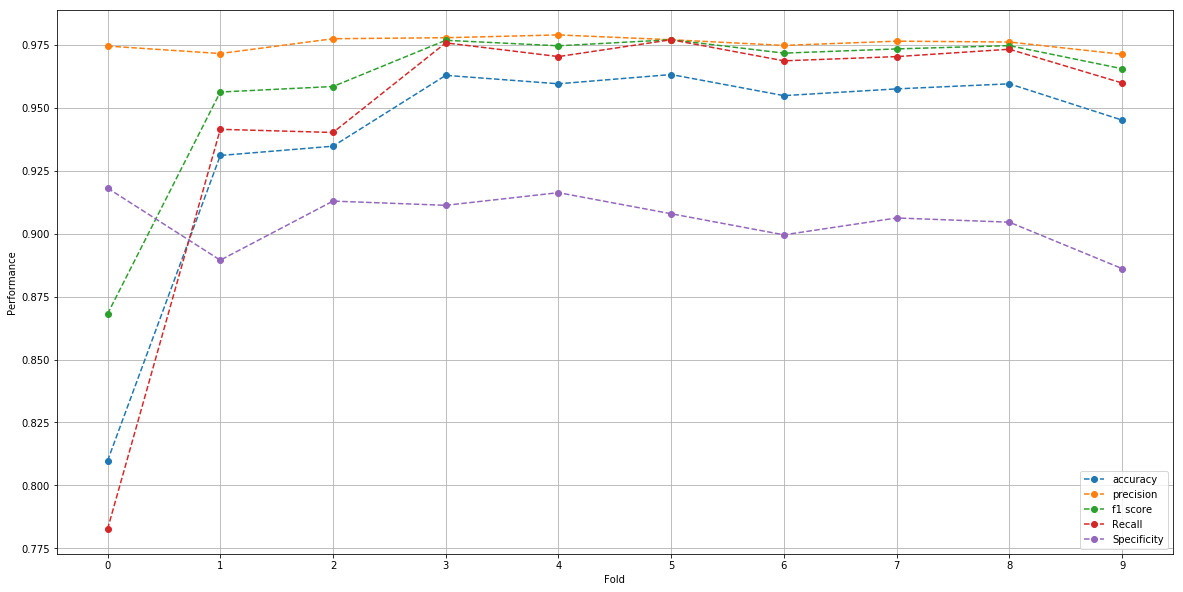

In [27]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dtc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
dtc_sc_pr = append_avgs(dtc_sc_pr)
draw(dtc_sc_pr)

In [28]:
dtc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.157908,0.018005,0.868091,0.974453,0.809779,0.782663,0.918060
1,0.135905,0.016007,0.956207,0.971490,0.931011,0.941398,0.889447
2,0.142918,0.015990,0.958396,0.977372,0.934695,0.940142,0.912898
3,0.141918,0.015975,0.976744,0.977768,0.962827,0.975722,0.911223
4,0.139908,0.015993,0.974564,0.978885,0.959478,0.970280,0.916248
5,0.155908,0.015991,0.976968,0.976968,0.963149,0.976968,0.907873
6,0.135921,0.017989,0.971645,0.974716,0.954774,0.968593,0.899497
7,0.134942,0.015990,0.973325,0.976401,0.957454,0.970268,0.906198
8,0.137920,0.016990,0.974628,0.976060,0.959464,0.973199,0.904523
9,0.159891,0.024004,0.965459,0.971186,0.945059,0.959799,0.886097


##### Single Model

In [44]:
# instantiate the model 
dtc = make_pipeline(StandardScaler(), DecisionTreeClassifier())
# fit the model 

dtc.fit(X_train_1, y_train_1)

dtc_test_pred = dtc.predict(X_test_1)

print("The DTC's classification report:\n\n",classification_report(y_test_1, dtc_test_pred))
print("The DTC's confusion matrix:\n\n",confusion_matrix(y_test_1, dtc_test_pred))
print("Recall: ", recall_score(y_test_1, dtc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, dtc_test_pred))
print("Specificity: ", specificity(y_test_1, dtc_test_pred))
print("F-1: ", f1_score(y_test_1, dtc_test_pred))

The DTC's classification report:

               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1976
           1       0.98      0.97      0.97      7976

    accuracy                           0.96      9952
   macro avg       0.93      0.94      0.93      9952
weighted avg       0.96      0.96      0.96      9952

The DTC's confusion matrix:

 [[1785  191]
 [ 250 7726]]
Recall:  0.9686559679037111
Accuracy:  0.9556872990353698
Specificity:  0.90334008097166
F-1:  0.9722519348140692


In [46]:
dtc_preds = dtc.predict(unlabeled)

In [24]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=X.columns,
                                class_names=["whitelist","malicious"],
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('test-output/decision_tree1.gv', view=True)

'test-output\\decision_tree1.gv.pdf'

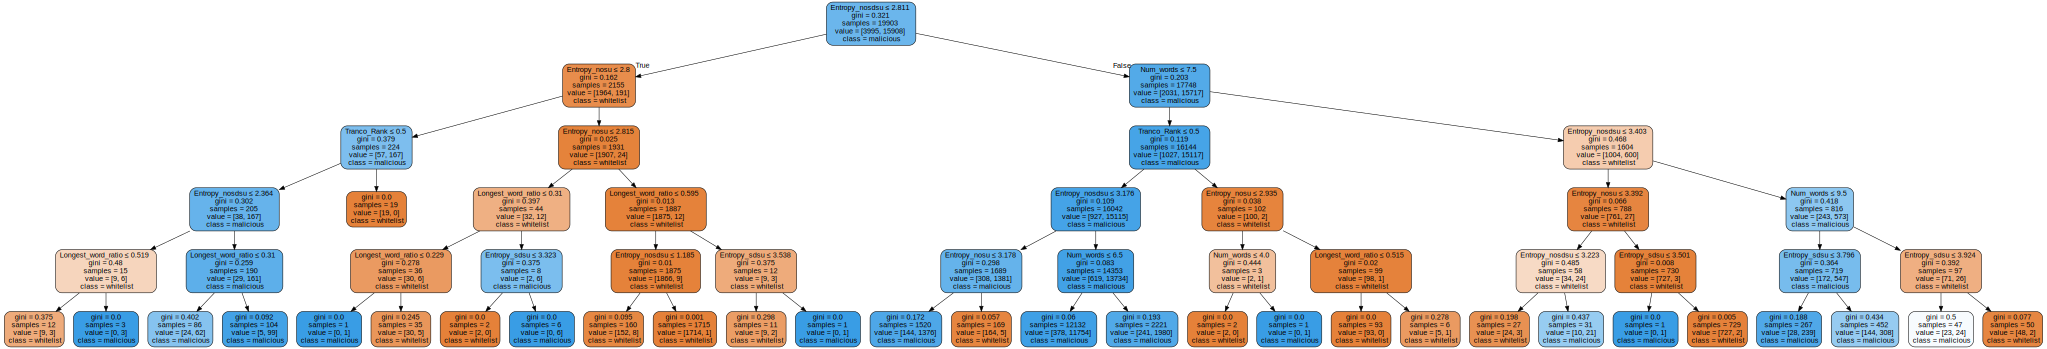

In [25]:
graph

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.627544)
2. Num_words (0.215828)
3. Entropy_nosu (0.103488)
4. Tranco_Rank (0.042734)
5. Entropy_sdsu (0.007051)
6. Longest_word_ratio (0.003354)
7. Other_numbers (0.000000)
8. Freenom_TLD (0.000000)
9. Typos (0.000000)
10. Hyphen (0.000000)
11. Num_chars (0.000000)


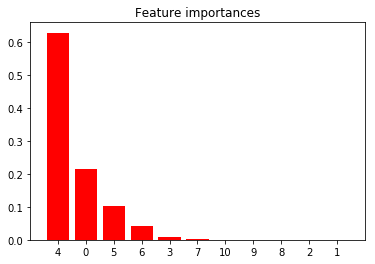

In [26]:
importances = dtc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.33, random_state=42)

In [28]:
# build normal model
pipeline = make_pipeline(DecisionTreeClassifier())
model = pipeline.fit(X_train_2, y_train_2)
prediction = model.predict(X_test_2)

# build model with undersampling
nearmiss_pipeline = make_pipeline_imb(NearMiss(sampling_strategy=0.25), DecisionTreeClassifier())
nearmiss_model = nearmiss_pipeline.fit(X_train_2, y_train_2)
nearmiss_prediction = nearmiss_model.predict(X_test_2)

In [29]:
from imblearn.metrics import classification_report_imbalanced

In [30]:
print(classification_report_imbalanced(y_test_2, nearmiss_prediction))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.32      0.89      0.81      0.47      0.85      0.73      2000
          1       0.99      0.81      0.89      0.89      0.85      0.72     20314

avg / total       0.93      0.82      0.88      0.85      0.85      0.72     22314



In [31]:
print(accuracy_score(y_test_2, nearmiss_prediction))

0.8199336739266828


#### Undersampled in pipeline

In [32]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), DecisionTreeClassifier())
dtc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
dtc_sc = append_avgs(dtc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


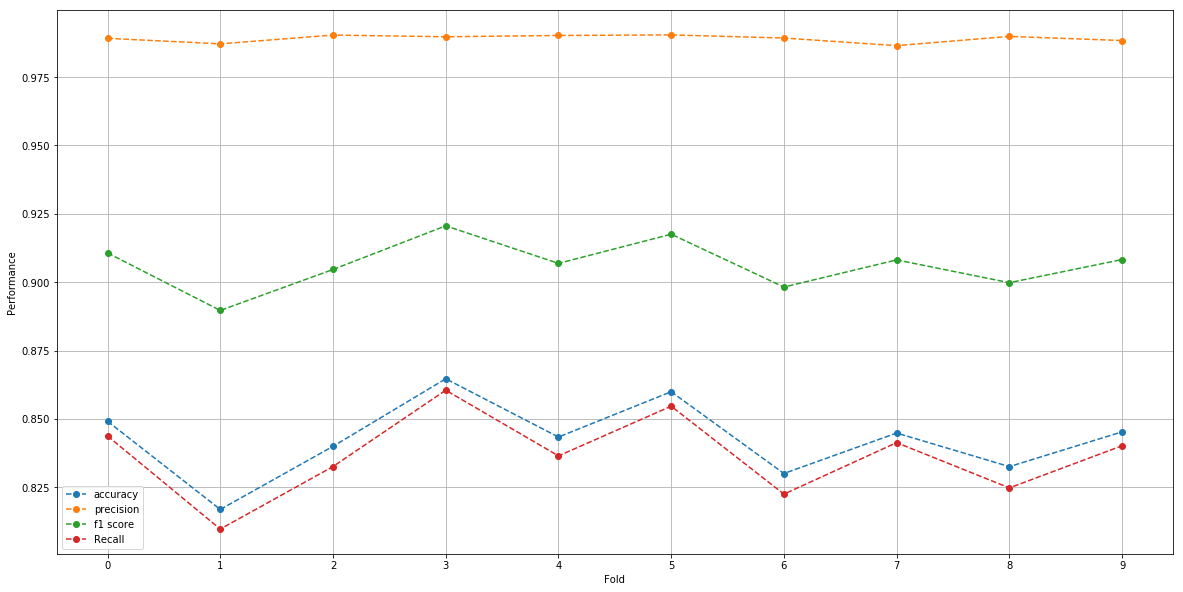

In [33]:
draw(dtc_sc)

#### Compare averages

In [62]:
compare_avgs(dtc_sc, dtc_sc_pr)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,0.842216,0.015690,0.989102,0.836661,0.906454,0.842685
1,0.145713,0.010396,0.975502,0.947787,0.960602,0.939209


## Random Forest

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


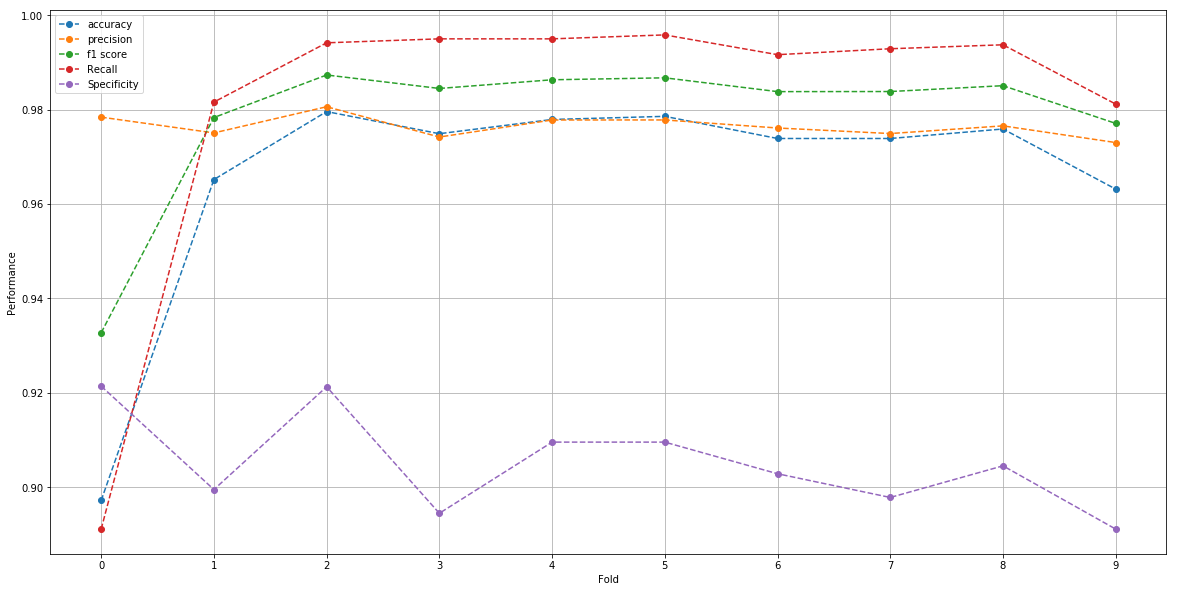

In [23]:
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
rfc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
rfc_sc_pr = append_avgs(rfc_sc_pr)
draw(rfc_sc_pr)

In [24]:
rfc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,2.984294,0.088948,0.932720,0.978391,0.897187,0.891122,0.921405
1,2.906309,0.089959,0.978306,0.975052,0.965171,0.981582,0.899497
2,3.124198,0.085951,0.987321,0.980595,0.979571,0.994140,0.921273
3,3.016280,0.085951,0.984469,0.974180,0.974883,0.994977,0.894472
4,3.058239,0.087937,0.986307,0.977787,0.977897,0.994977,0.909548
5,3.150204,0.083950,0.986722,0.977796,0.978559,0.995812,0.909548
6,2.928314,0.084954,0.983797,0.976092,0.973869,0.991625,0.902848
7,2.942305,0.084951,0.983817,0.974918,0.973869,0.992881,0.897822
8,2.884340,0.083935,0.985056,0.976543,0.975879,0.993719,0.904523
9,3.017281,0.087947,0.977064,0.973007,0.963149,0.981156,0.891122


##### Single Model

In [43]:
# instantiate the model 
rfc = make_pipeline(StandardScaler(), RandomForestClassifier())
# fit the model 

rfc.fit(X_train_1, y_train_1)

rfc_test_pred = rfc.predict(X_test_1)

print("The RFC's classification report:\n\n",classification_report(y_test_1, rfc_test_pred))
print("The RFC's confusion matrix:\n\n",confusion_matrix(y_test_1, rfc_test_pred))
print("Recall: ", recall_score(y_test_1, rfc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, rfc_test_pred))
print("Specificity: ", specificity(y_test_1, rfc_test_pred))
print("F-1: ", f1_score(y_test_1, rfc_test_pred))

The RFC's classification report:

               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1976
           1       0.97      0.99      0.98      7976

    accuracy                           0.97      9952
   macro avg       0.97      0.94      0.95      9952
weighted avg       0.97      0.97      0.97      9952

The RFC's confusion matrix:

 [[1767  209]
 [  79 7897]]
Recall:  0.9900952858575727
Accuracy:  0.9710610932475884
Specificity:  0.8942307692307693
F-1:  0.9820917796293993


In [47]:
rfc_preds = rfc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.382903)
2. Tranco_Rank (0.140803)
3. Num_words (0.121947)
4. Entropy_nosu (0.097573)
5. Num_chars (0.094598)
6. Longest_word_ratio (0.079891)
7. Entropy_sdsu (0.068514)
8. Other_numbers (0.005783)
9. Hyphen (0.005593)
10. Typos (0.002395)
11. Freenom_TLD (0.000000)


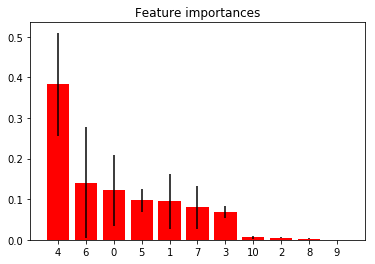

In [38]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

In [39]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), RandomForestClassifier())
rfc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
rfc_sc = append_avgs(rfc_sc)

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


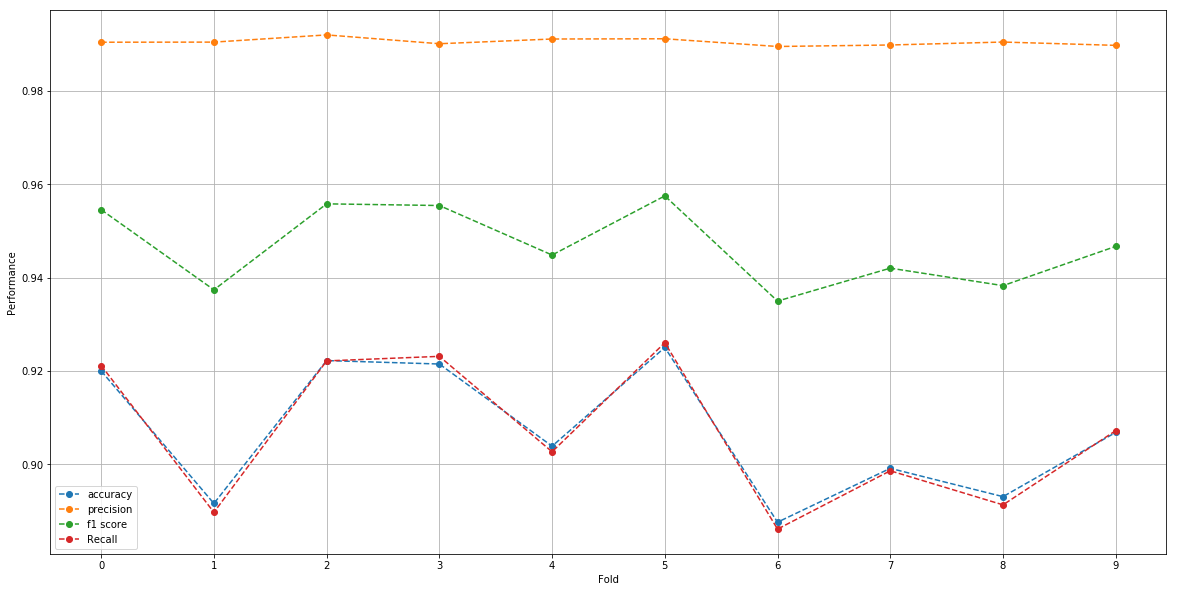

In [40]:
draw(rfc_sc)

#### Compare averages

In [75]:
compare_avgs(rfc_sc, rfc_sc_pr)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,4.198385,0.169003,0.990462,0.906805,0.946731,0.907078
1,3.029807,0.079550,0.976442,0.980362,0.978112,0.965367


## XGBoost

In [34]:
# XGboost classifier
from xgboost import XGBClassifier, plot_importance

H:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
H:\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


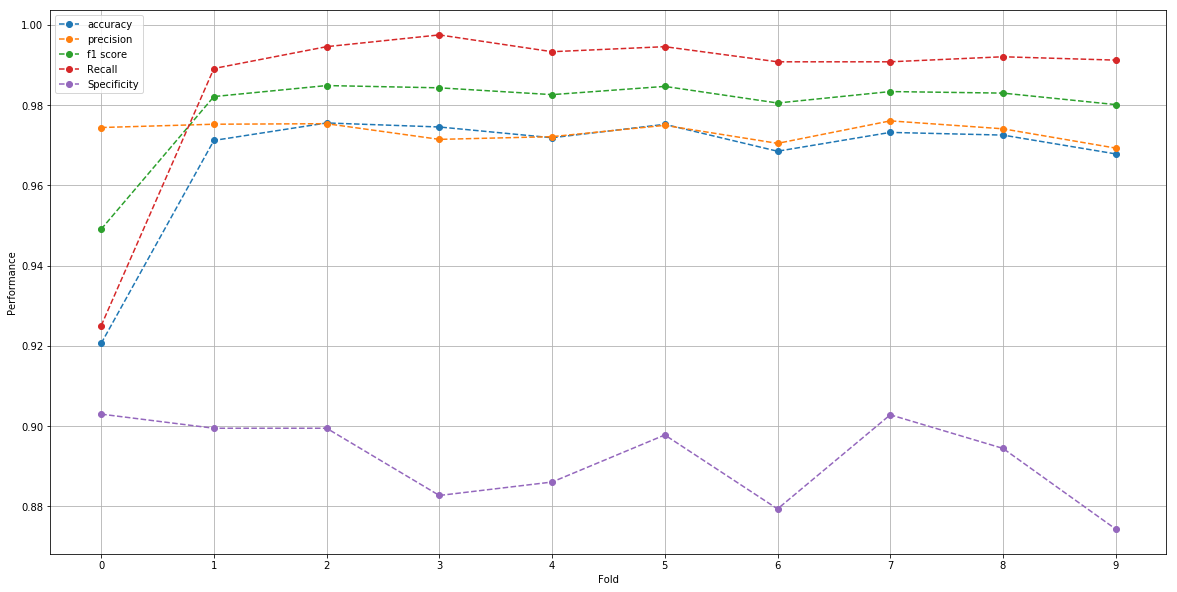

In [26]:
clf = make_pipeline(StandardScaler(), XGBClassifier())
xgb_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
xgb_sc_pr = append_avgs(xgb_sc_pr)
draw(xgb_sc_pr)

In [27]:
xgb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,0.780547,0.044974,0.949087,0.974416,0.920630,0.925042,0.903010
1,0.741573,0.039977,0.982128,0.975237,0.971199,0.989117,0.899497
2,0.810534,0.041975,0.984870,0.975369,0.975553,0.994558,0.899497
3,0.765559,0.041975,0.984304,0.971464,0.974548,0.997488,0.882747
4,0.777552,0.041976,0.982609,0.972143,0.971869,0.993303,0.886097
5,0.762560,0.041976,0.984660,0.974959,0.975209,0.994556,0.897822
6,0.733578,0.040977,0.980522,0.970468,0.968509,0.990787,0.879397
7,0.735576,0.041977,0.983375,0.976073,0.973199,0.990787,0.902848
8,0.784549,0.040976,0.982988,0.974095,0.972529,0.992044,0.894472
9,0.755564,0.041976,0.980124,0.969287,0.967839,0.991206,0.874372


##### Single Model

In [46]:
# instantiate the model 
xgb = make_pipeline(StandardScaler(), XGBClassifier())
# fit the model 

xgb.fit(X_train_1, y_train_1)

xgb_test_pred = rfc.predict(X_test_1)

print("The XGB's classification report:\n\n",classification_report(y_test_1, xgb_test_pred))
print("The XGB's confusion matrix:\n\n",confusion_matrix(y_test_1, xgb_test_pred))
print("Recall: ", recall_score(y_test_1, xgb_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, xgb_test_pred))
print("Specificity: ", specificity(y_test_1, xgb_test_pred))
print("F-1: ", f1_score(y_test_1, xgb_test_pred))

The XGB's classification report:

               precision    recall  f1-score   support

           0       0.96      0.89      0.92      1976
           1       0.97      0.99      0.98      7976

    accuracy                           0.97      9952
   macro avg       0.97      0.94      0.95      9952
weighted avg       0.97      0.97      0.97      9952

The XGB's confusion matrix:

 [[1767  209]
 [  79 7897]]
Recall:  0.9900952858575727
Accuracy:  0.9710610932475884
Specificity:  0.8942307692307693
F-1:  0.9820917796293993


In [50]:
xgb_preds = xgb.predict(unlabeled)

###### Feature importance

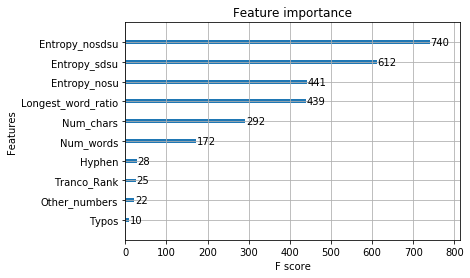

In [44]:
plot_importance(xgb)

Feature ranking:
1. Tranco_Rank (0.377101)
2. Num_words (0.208959)
3. Entropy_nosdsu (0.159639)
4. Entropy_nosu (0.073894)
5. Typos (0.047118)
6. Other_numbers (0.040552)
7. Hyphen (0.028086)
8. Num_chars (0.024492)
9. Entropy_sdsu (0.022992)
10. Longest_word_ratio (0.017167)
11. Freenom_TLD (0.000000)


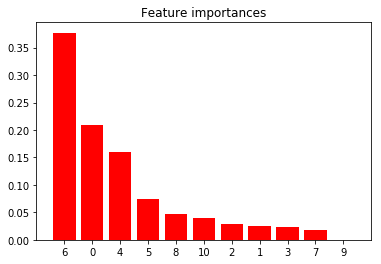

In [45]:
importances = xgb.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


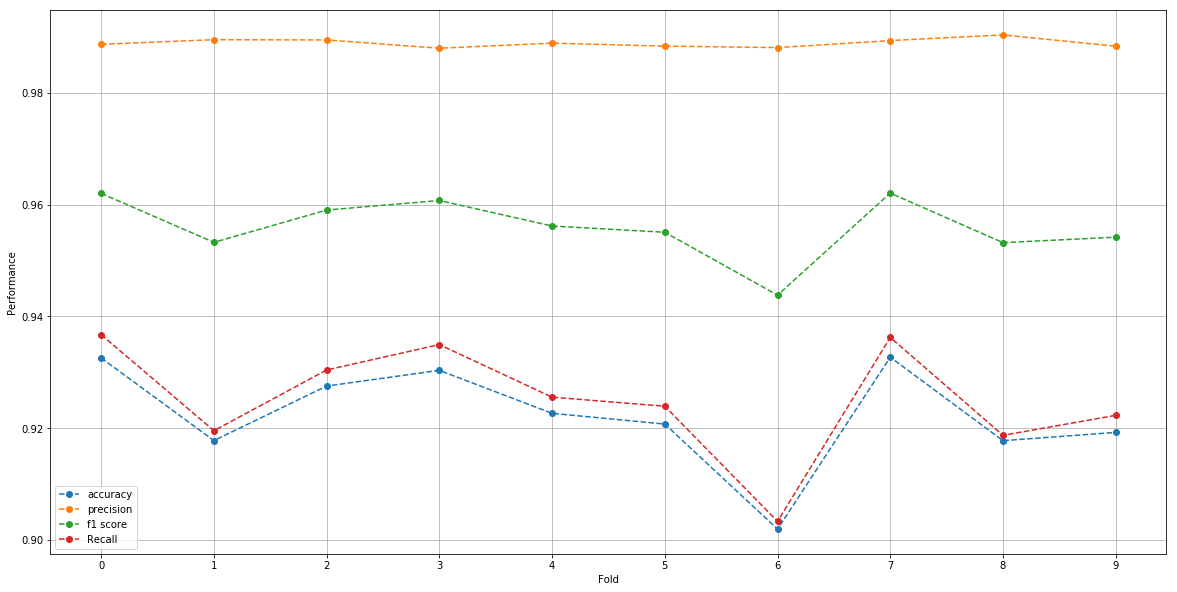

In [46]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), XGBClassifier())
xgb_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
xgb_sc = append_avgs(xgb_sc)

draw(xgb_sc)

#### Compare averages

In [64]:
compare_avgs(xgb_sc, xgb_sc_pr)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,1.854531,0.040777,0.988920,0.925168,0.955956,0.922326
1,1.157433,0.024586,0.973351,0.985889,0.979467,0.967108


## GBC

In [36]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


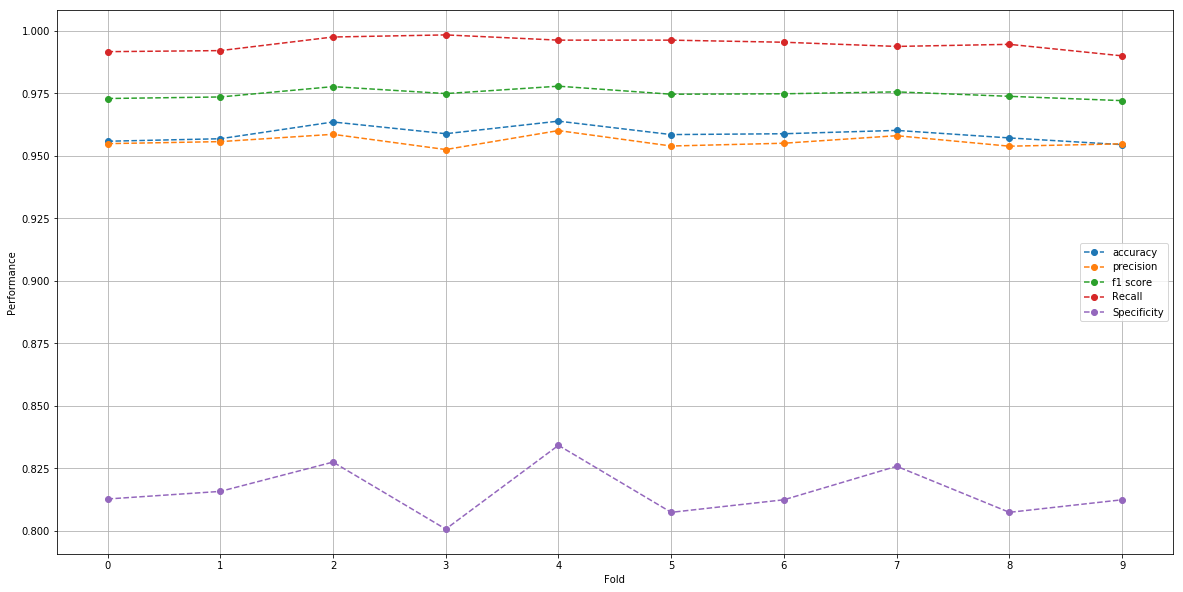

In [29]:
clf = make_pipeline(StandardScaler(), GradientBoostingClassifier())
gb_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
gb_sc_pr = append_avgs(gb_sc_pr)
draw(gb_sc_pr)

In [30]:
gb_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,2.879358,0.021971,0.972884,0.954839,0.955794,0.991625,0.812709
1,2.956297,0.022971,0.973506,0.955645,0.956798,0.992047,0.815745
2,3.409051,0.020987,0.977641,0.958568,0.963496,0.997488,0.827471
3,2.923301,0.026985,0.974862,0.952476,0.958808,0.998326,0.800670
4,3.083650,0.019989,0.977814,0.960065,0.963831,0.996233,0.834171
5,2.823359,0.021986,0.974601,0.953889,0.958459,0.996231,0.807370
6,2.810399,0.021987,0.974780,0.955002,0.958794,0.995394,0.812395
7,2.791393,0.020988,0.975540,0.958014,0.960134,0.993719,0.825796
8,2.808392,0.021986,0.973760,0.953815,0.957119,0.994556,0.807370
9,2.803386,0.021005,0.972039,0.954766,0.954439,0.989950,0.812395


##### Single Model

In [39]:
# instantiate the model 
gbc = make_pipeline(StandardScaler(), GradientBoostingClassifier())
# fit the model 

gbc.fit(X_train_1, y_train_1)

gbc_test_pred = gbc.predict(X_test_1)

print("The GBC's classification report:\n\n",classification_report(y_test_1, gbc_test_pred))
print("The GBC's confusion matrix:\n\n",confusion_matrix(y_test_1, gbc_test_pred))
print("Recall: ", recall_score(y_test_1, gbc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, gbc_test_pred))
print("Specificity: ", specificity(y_test_1, gbc_test_pred))
print("F-1: ", f1_score(y_test_1, gbc_test_pred))

The GBC's classification report:

               precision    recall  f1-score   support

           0       0.97      0.81      0.88      1976
           1       0.95      0.99      0.97      7976

    accuracy                           0.96      9952
   macro avg       0.96      0.90      0.93      9952
weighted avg       0.96      0.96      0.96      9952

The GBC's confusion matrix:

 [[1591  385]
 [  47 7929]]
Recall:  0.9941073219658977
Accuracy:  0.9565916398713826
Specificity:  0.805161943319838
F-1:  0.9734806629834254


In [51]:
gbc_preds = gbc.predict(unlabeled)

###### Feature importance

Feature ranking:
1. Entropy_nosdsu (0.598842)
2. Entropy_nosu (0.164506)
3. Num_words (0.140546)
4. Tranco_Rank (0.033561)
5. Num_chars (0.021588)
6. Entropy_sdsu (0.020052)
7. Longest_word_ratio (0.015650)
8. Other_numbers (0.003830)
9. Typos (0.001167)
10. Hyphen (0.000258)
11. Freenom_TLD (0.000000)


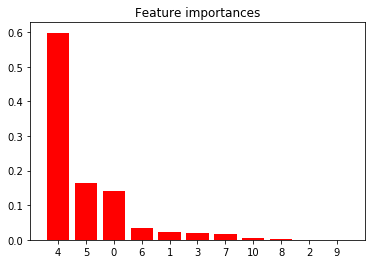

In [50]:
importances = gbc.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


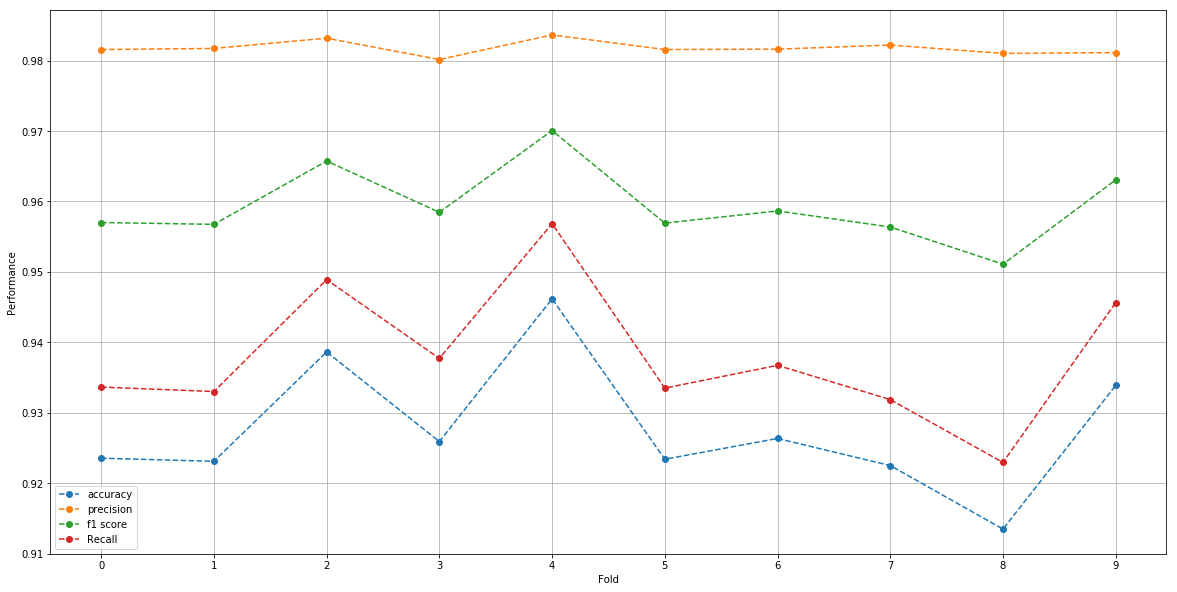

In [51]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), GradientBoostingClassifier())
gb_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
gb_sc = append_avgs(gb_sc)

draw(gb_sc)

#### Compare averages

In [65]:
compare_avgs(gb_sc, gb_sc_pr)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,3.682575,0.027684,0.981795,0.938081,0.959419,0.927694
1,3.266219,0.016689,0.955708,0.994557,0.974743,0.958767


## Perceptrons

In [38]:
from sklearn.neural_network import MLPClassifier

### Baseline

#### Previously Undersampled

H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\s

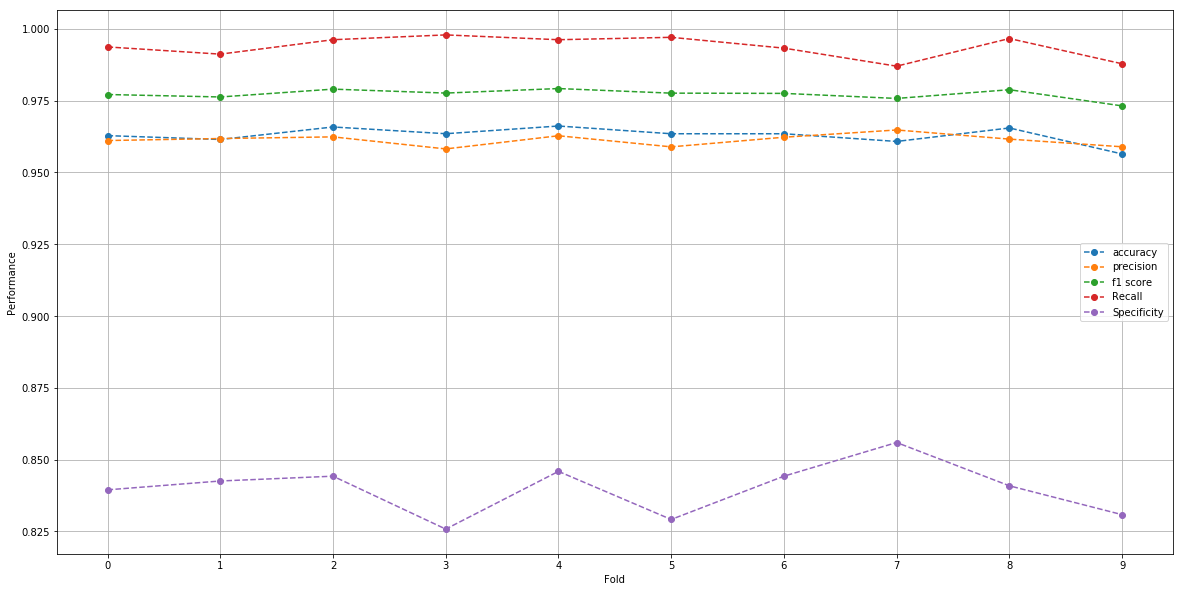

In [32]:
clf = make_pipeline(StandardScaler(), MLPClassifier())
mlp_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
mlp_sc_pr = append_avgs(mlp_sc_pr)
draw(mlp_sc_pr)

In [33]:
mlp_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,47.059872,0.024984,0.977146,0.961118,0.962827,0.993719,0.839465
1,40.002628,0.025985,0.976294,0.961820,0.961487,0.991210,0.842546
2,36.901770,0.024999,0.979021,0.962394,0.965841,0.996233,0.844221
3,34.275430,0.023992,0.977650,0.958199,0.963496,0.997907,0.825796
4,19.260824,0.024991,0.979222,0.962783,0.966175,0.996233,0.845896
5,45.896048,0.032980,0.977623,0.958921,0.963484,0.997069,0.829146
6,41.118437,0.023992,0.977540,0.962272,0.963484,0.993300,0.844221
7,46.162640,0.025991,0.975781,0.964797,0.960804,0.987018,0.855946
8,46.044649,0.025983,0.978820,0.961616,0.965494,0.996650,0.840871
9,46.049734,0.025002,0.973185,0.958943,0.956449,0.987856,0.830821


##### Single Model

In [40]:
# instantiate the model 
mlp = make_pipeline(StandardScaler(), MLPClassifier())
# fit the model 

mlp.fit(X_train_1, y_train_1)

mlp_test_pred = mlp.predict(X_test_1)

print("The MLP's classification report:\n\n", classification_report(y_test_1, mlp_test_pred))
print("The MLP's confusion matrix:\n\n", confusion_matrix(y_test_1, mlp_test_pred))
print("Recall: ", recall_score(y_test_1, mlp_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, mlp_test_pred))
print("Specificity: ", specificity(y_test_1, mlp_test_pred))
print("F-1: ", f1_score(y_test_1, mlp_test_pred))

The MLP's classification report:

               precision    recall  f1-score   support

           0       0.96      0.84      0.89      1976
           1       0.96      0.99      0.98      7976

    accuracy                           0.96      9952
   macro avg       0.96      0.91      0.93      9952
weighted avg       0.96      0.96      0.96      9952

The MLP's confusion matrix:

 [[1651  325]
 [  71 7905]]
Recall:  0.991098294884654
Accuracy:  0.9602090032154341
Specificity:  0.8355263157894737
F-1:  0.975564605701592


In [52]:
mlp_preds = mlp.predict(unlabeled)

#### Undersampled in pipeline

H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, n

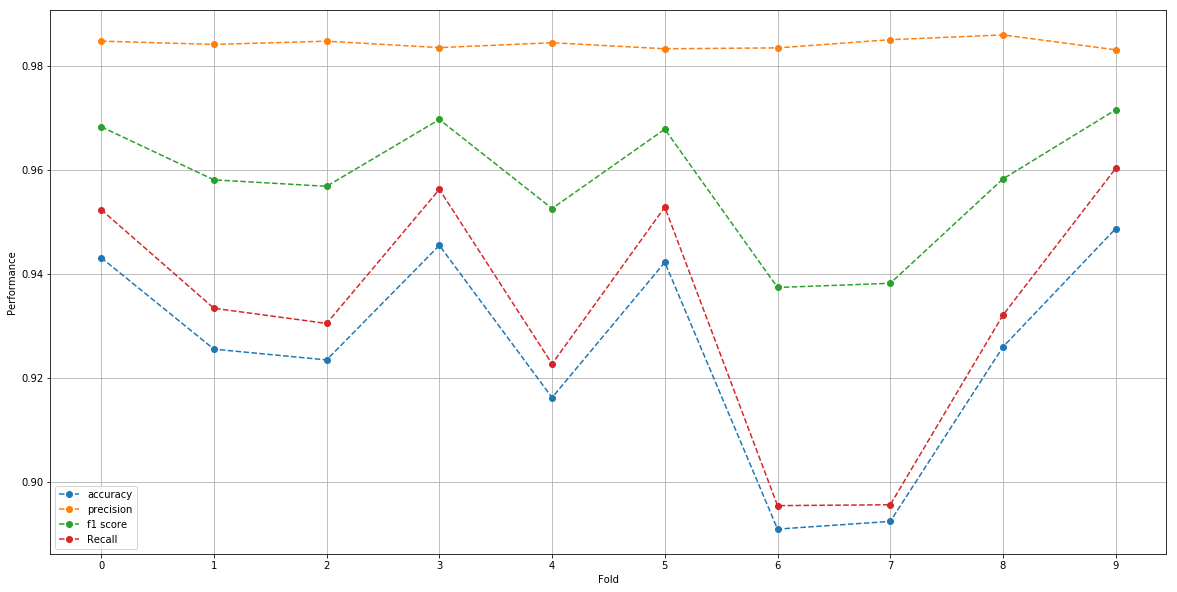

In [54]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), MLPClassifier())
mlp_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
mlp_sc = append_avgs(mlp_sc)

draw(mlp_sc)

#### Compare averages

In [66]:
compare_avgs(mlp_sc, mlp_sc_pr)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,36.022255,0.034983,0.984214,0.933084,0.957826,0.925342
1,33.035136,0.019489,0.961130,0.993720,0.977149,0.962820


## SVM

In [41]:
from sklearn.svm import SVC

### Baseline

#### Previously Undersampled

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


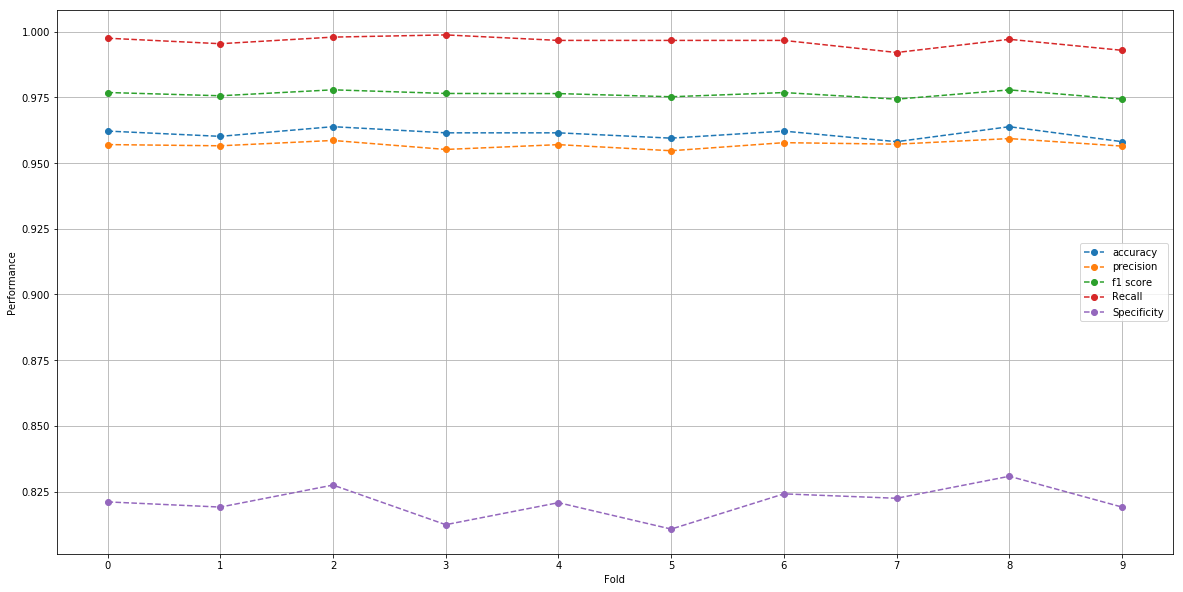

In [35]:
clf = make_pipeline(StandardScaler(), SVC(verbose=1))
svc_sc_pr = cross_validate(clf, X_nearmiss, y_nearmiss, cv=10, scoring=scoring)
svc_sc_pr = append_avgs(svc_sc_pr)
draw(svc_sc_pr)

In [36]:
svc_sc_pr

,fit_time,score_time,test_f1,test_precision,test_accuracy,test_sensitivity,test_specificity
0,9.374231,0.282854,0.976830,0.957011,0.962157,0.997487,0.821070
1,9.129726,0.282856,0.975590,0.956557,0.960147,0.995396,0.819095
2,9.318280,0.294833,0.977851,0.958585,0.963831,0.997907,0.827471
3,9.180027,0.282823,0.976468,0.955164,0.961487,0.998744,0.812395
4,10.033238,0.280838,0.976420,0.956994,0.961487,0.996651,0.820771
5,9.558566,0.311819,0.975210,0.954673,0.959464,0.996650,0.810720
6,9.768839,0.281836,0.976811,0.957746,0.962144,0.996650,0.824121
7,9.774203,0.277857,0.974296,0.957172,0.958124,0.992044,0.822446
8,10.349256,0.281853,0.977823,0.959307,0.963819,0.997069,0.830821
9,9.251657,0.275857,0.974317,0.956434,0.958124,0.992881,0.819095


##### Single Model

In [42]:
# instantiate the model 
svc = make_pipeline(StandardScaler(), SVC())
# fit the model 

svc.fit(X_train_1, y_train_1)

svc_test_pred = svc.predict(X_test_1)

print("The SVM's classification report:\n\n", classification_report(y_test_1, svc_test_pred))
print("The SVM's confusion matrix:\n\n", confusion_matrix(y_test_1, svc_test_pred))
print("Recall: ", recall_score(y_test_1, svc_test_pred))
print("Accuracy: ", accuracy_score(y_test_1, svc_test_pred))
print("Specificity: ", specificity(y_test_1, svc_test_pred))
print("F-1: ", f1_score(y_test_1, svc_test_pred))

The SVM's classification report:

               precision    recall  f1-score   support

           0       0.98      0.81      0.89      1976
           1       0.95      1.00      0.97      7976

    accuracy                           0.96      9952
   macro avg       0.97      0.90      0.93      9952
weighted avg       0.96      0.96      0.96      9952

The SVM's confusion matrix:

 [[1598  378]
 [  34 7942]]
Recall:  0.9957372116349047
Accuracy:  0.9586012861736335
Specificity:  0.8087044534412956
F-1:  0.9747177221404025


In [53]:
svc_preds = svc.predict(unlabeled)

###### Feature importance

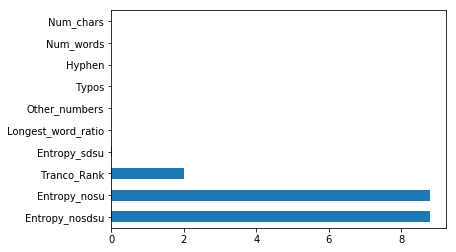

In [58]:
pd.Series(abs(svc.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

In [59]:
svc.coef_

array([[-3.20340983e-04, -1.01057597e-04, -5.61028771e-04,
        -5.18768008e-03,  8.79340706e+00, -8.78641478e+00,
        -2.00187143e+00,  2.31415328e-03, -2.02467499e-03,
         0.00000000e+00, -2.05121148e-03]])

#### Undersampled in pipeline

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

H:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
H:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


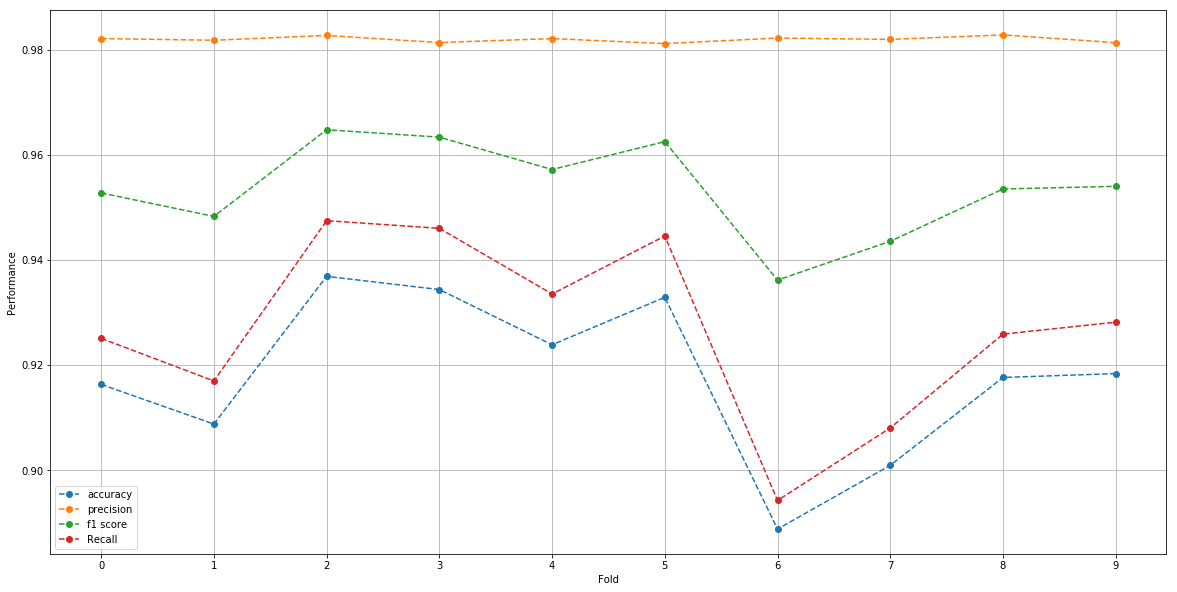

In [60]:
clf = make_pipeline_imb(NearMiss(sampling_strategy=0.25), StandardScaler(), SVC(verbose=1))
svc_sc = cross_validate(clf, X, y, cv=10, scoring=scoring)
svc_sc = append_avgs(svc_sc)

draw(svc_sc)

#### Compare averages

In [67]:
compare_avgs(svc_sc, svc_sc_pr)

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
0,10.149446,0.619743,0.981925,0.926968,0.953580,0.917859
1,10.082104,0.278241,0.956964,0.996148,0.976162,0.961078


In [54]:
ul = pd.read_csv('unlabeled_predictions.csv')
dtc_preds = pd.Series(dtc_preds, name='Labeled dtc')
rfc_preds = pd.Series(rfc_preds, name='Labeled rfc')
xgb_preds = pd.Series(xgb_preds, name='Labeled xgb')
gbc_preds = pd.Series(gbc_preds, name='Labeled gbc')
mlp_preds = pd.Series(mlp_preds, name='Labeled mlp')
svc_preds = pd.Series(svc_preds, name='Labeled svc')

In [55]:
df = pd.concat([ul, dtc_preds, rfc_preds, xgb_preds, gbc_preds, mlp_preds, svc_preds], axis=1)
df.to_csv('unlabeled_predictions.csv', index=False, header=True)